In [40]:

import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [33]:
# Define the paths to your image and annotation folders
path_image = "../data/external/Coral_images/image02"
path_annotations = "../data/external/Coral_images/annotation"

# Initialize lists to store images, labels, and masks
images = []
labels = []
masks = []

# Common image size (e.g., 224x224)
common_image_size = (224, 224)

# Iterate through each XML file in the annotation folder
for xml_filename in os.listdir(path_annotations):
    if xml_filename.lower().endswith(".xml"):
        xml_path = os.path.join(path_annotations, xml_filename)

        # Extract the corresponding image filename
        image_filename = xml_filename.replace(".xml", ".jpg")
        image_path = os.path.join(path_image, image_filename)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Image not found for XML: {xml_filename}")
            continue

        # Parse the XML file to extract the label and bounding box coordinates
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Initialize a mask for the original-sized image
        original_image = cv2.imread(image_path)
        original_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)

        for object_elem in root.findall("object"):
            name_elem = object_elem.find("name")
            bndbox_elem = object_elem.find("bndbox")

            if name_elem is not None and bndbox_elem is not None:
                label = name_elem.text
                xmin = int(bndbox_elem.find("xmin").text)
                ymin = int(bndbox_elem.find("ymin").text)
                xmax = int(bndbox_elem.find("xmax").text)
                ymax = int(bndbox_elem.find("ymax").text)

                # Create a binary mask using the bounding box coordinates
                object_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)
                object_mask[ymin:ymax, xmin:xmax] = 1

                # Add the object mask to the composite mask
                original_mask = np.maximum(original_mask, object_mask)

        # Resize the original-sized image and mask to the common size
        image = cv2.resize(original_image, common_image_size)
        mask = cv2.resize(original_mask, common_image_size)

        # Append the resized image and label to the lists
        images.append(image)
        labels.append(label)

        # Append the resized mask to the masks list
        masks.append(mask)

# Convert the lists to NumPy arrays
images = np.array(images)
masks = np.array(masks)
labels = np.array(labels)

# Now, you have NumPy arrays for the resized images, masks, and labels
print(f"Images shape: {images.shape}")
print(f"Masks shape: {masks.shape}")
print(f"Labels shape: {labels.shape}")
# Check class distribution
unique_labels, class_counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, class_counts):
    print(f"Class: {label}, Count: {count}")


Images shape: (899, 224, 224, 3)
Masks shape: (899, 224, 224)
Labels shape: (899,)
Class: APAL, Count: 113
Class: Pseudodiploria, Count: 786


In [34]:
# Filter images and labels for the "apal" class
apal_images = images[labels == "APAL"]
apal_labels = labels[labels == "APAL"]
apal_masks = masks[labels == "APAL"]
# Check the shape of the filtered data
print(f"Filtered APAL Images shape: {apal_images.shape}")
print(f"Filtered APAL Labels shape: {apal_labels.shape}")
print(f"Filtered APAL Labels shape: {apal_masks.shape}")

Filtered APAL Images shape: (113, 224, 224, 3)
Filtered APAL Labels shape: (113,)
Filtered APAL Labels shape: (113, 224, 224)


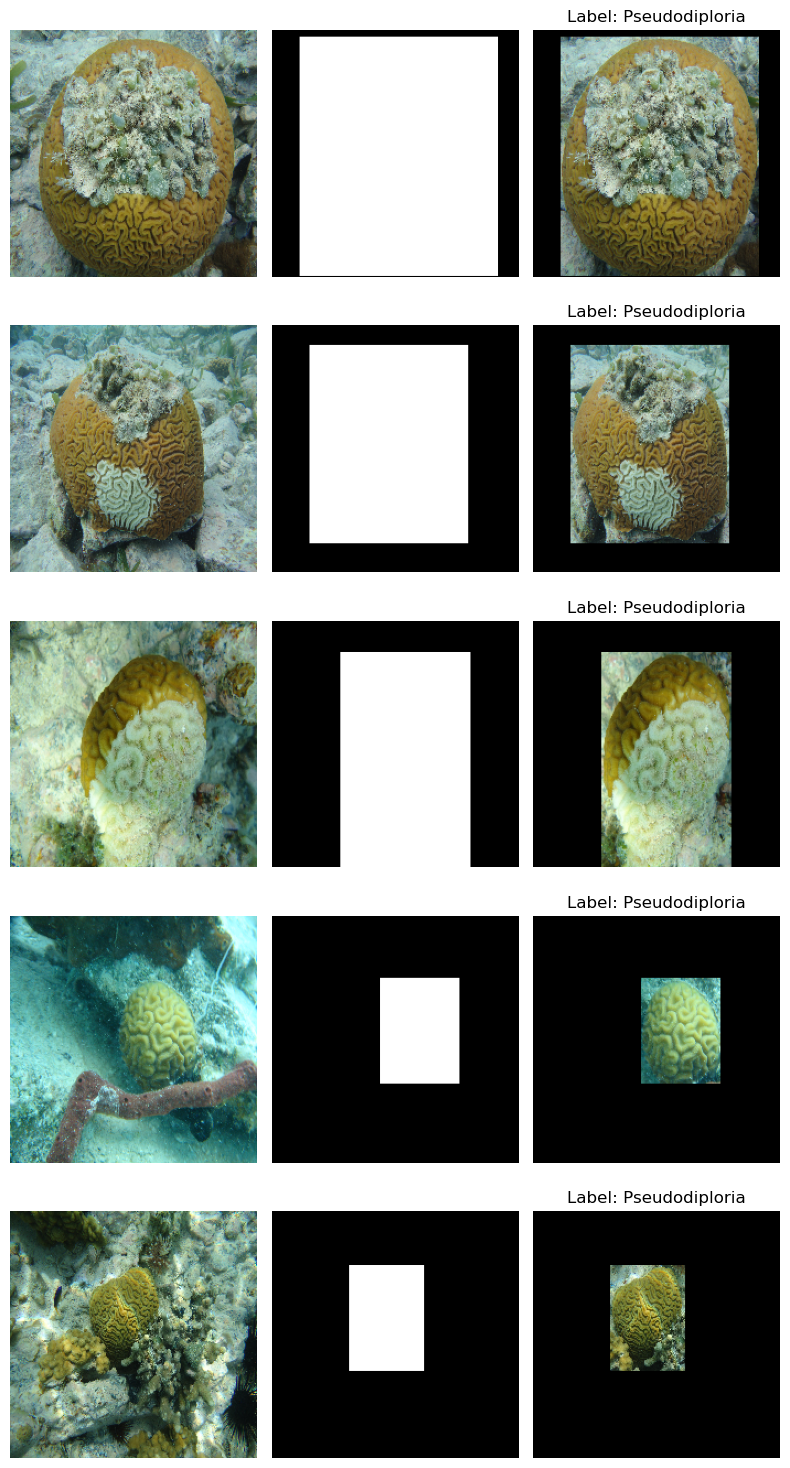

In [35]:
# Number of image-mask pairs to display
num_pairs_to_display = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_pairs_to_display, 3, figsize=(8, 15))

# Display the first 5 image-mask pairs
for i in range(num_pairs_to_display):
    image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    mask = masks[i]
    label = labels[i]

    # Create a new image with only the masked region
    masked_region = cv2.bitwise_and(image, image, mask=mask)

    # Plot the original image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')

    # Plot the mask
    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].axis('off')

    # Plot the masked region
    axes[i, 2].imshow(masked_region)
    axes[i, 2].set_title(f"Label: {label}")
    axes[i, 2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [30]:
# # Define the paths to your image and annotation folders
# path_image = "../data/external/Coral_images/image02"
# path_annotations = "/Users/sumaiyauddin/Documents/Semester03/Coral_images/APAL"

# # Initialize lists to store images, labels, and masks
# images = []
# labels = []
# masks = []

# # Common image size (e.g., 224x224)
# common_image_size = (224, 224)

# # Iterate through each XML file in the annotation folder
# for xml_filename in os.listdir(path_annotations):
#     if xml_filename.lower().endswith(".xml"):
#         xml_path = os.path.join(path_annotations, xml_filename)

#         # Extract the corresponding image filename
#         image_filename = xml_filename.replace(".xml", ".jpg")
#         image_path = os.path.join(path_image, image_filename)

#         # Check if the image file exists
#         if not os.path.exists(image_path):
#             print(f"Image not found for XML: {xml_filename}")
#             continue

#         # Parse the XML file to extract the label and bounding box coordinates
#         tree = ET.parse(xml_path)
#         root = tree.getroot()

#         # Initialize a mask for the original-sized image
#         original_image = cv2.imread(image_path)
#         original_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)

#         for object_elem in root.findall("object"):
#             name_elem = object_elem.find("name")
#             bndbox_elem = object_elem.find("bndbox")

#             if name_elem is not None and bndbox_elem is not None:
#                 label = name_elem.text
#                 xmin = int(bndbox_elem.find("xmin").text)
#                 ymin = int(bndbox_elem.find("ymin").text)
#                 xmax = int(bndbox_elem.find("xmax").text)
#                 ymax = int(bndbox_elem.find("ymax").text)

#                 # Create a binary mask using the bounding box coordinates
#                 object_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)
#                 object_mask[ymin:ymax, xmin:xmax] = 1

#                 # Add the object mask to the composite mask
#                 original_mask = np.maximum(original_mask, object_mask)

#         # Resize the original-sized image and mask to the common size
#         image = cv2.resize(original_image, common_image_size)
#         mask = cv2.resize(original_mask, common_image_size)

#         # Append the resized image and label to the lists
#         images.append(image)
#         labels.append(label)

#         # Append the resized mask to the masks list
#         masks.append(mask)

# # Convert the lists to NumPy arrays
# images2 = np.array(images)
# masks2 = np.array(masks)
# labels2 = np.array(labels)

# # Now, you have NumPy arrays for the resized images, masks, and labels
# print(f"Images shape: {images2.shape}")
# print(f"Masks shape: {masks2.shape}")
# print(f"Labels shape: {labels2.shape}")


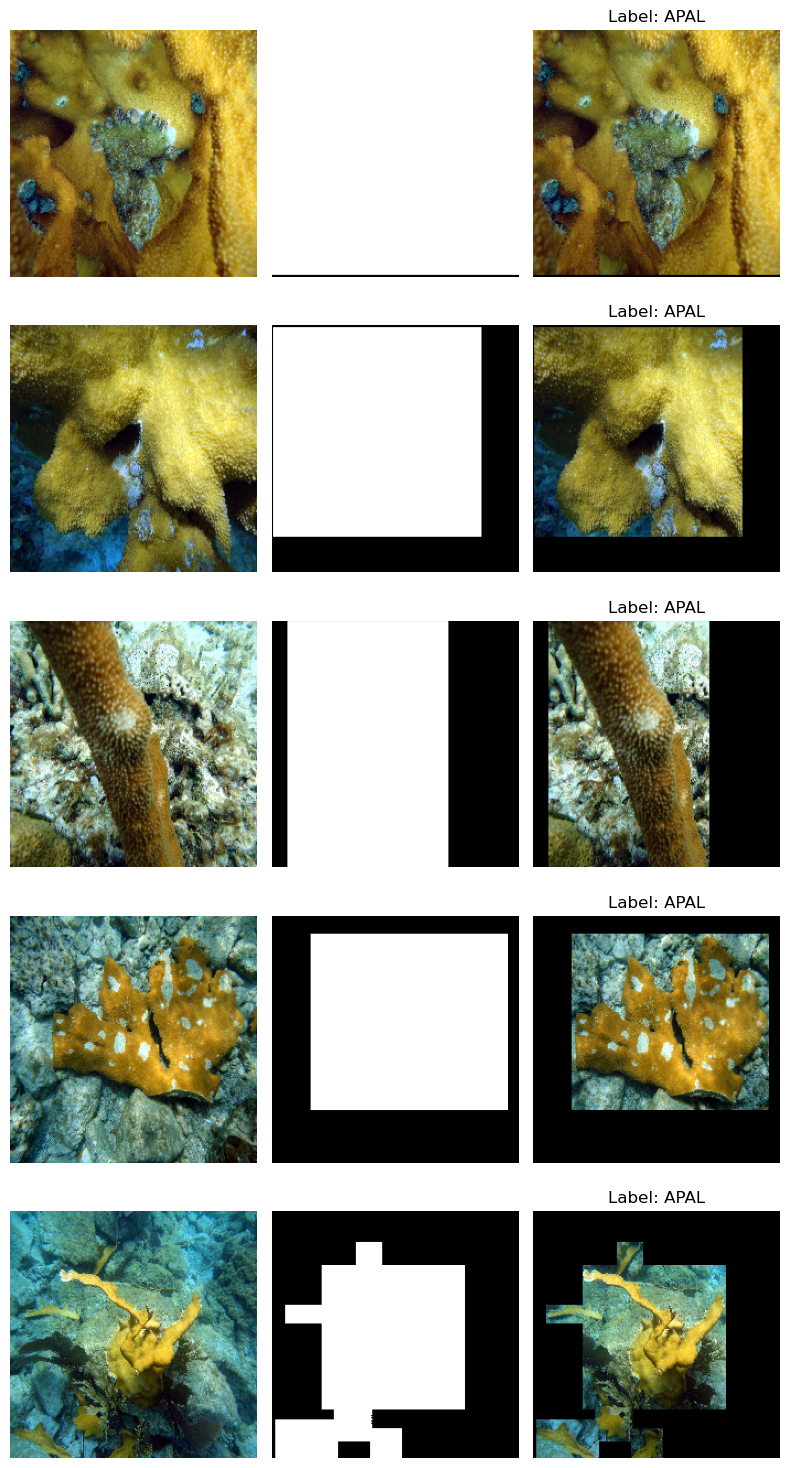

In [21]:
# Number of image-mask pairs to display
num_pairs_to_display = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_pairs_to_display, 3, figsize=(8, 15))

# Display the first 5 image-mask pairs
for i in range(num_pairs_to_display):
    image = cv2.cvtColor(images2[i], cv2.COLOR_BGR2RGB)
    mask = masks2[i]
    label = labels2[i]

    # Create a new image with only the masked region
    masked_region = cv2.bitwise_and(image, image, mask=mask)

    # Plot the original image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')

    # Plot the mask
    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].axis('off')

    # Plot the masked region
    axes[i, 2].imshow(masked_region)
    axes[i, 2].set_title(f"Label: {label}")
    axes[i, 2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [36]:
# Save the apal images to a pickle file
with open('images.pkl', 'wb') as file:
    pickle.dump(apal_images, file)

# Save the apal masks to a pickle file
with open('masks.pkl', 'wb') as file:
    pickle.dump(apal_masks, file)
    
# Save the apal labels to a pickle file
with open('labels.pkl', 'wb') as file:
    pickle.dump(apal_labels, file)


In [37]:


# Define the filenames for the pickle files
images2 = 'augmented_apal_images.pickle'
labels2 = 'augmented_apal_labels.pickle'
masks2 = 'augmented_apal_masks.pickle'

# Load the augmented images from the pickle file
with open(images2, 'rb') as file:
    images2 = pickle.load(file)

# Load the augmented labels from the pickle file
with open(labels2, 'rb') as file:
    labels2 = pickle.load(file)

# Load the augmented masks from the pickle file
with open(masks2, 'rb') as file:
    masks2 = pickle.load(file)
    
print("Loaded Images Shape:", images2.shape)
print("Loaded Labels Shape:", labels2.shape)
print("Loaded Masks Shape:", masks2.shape)




Loaded Images Shape: (565, 224, 224, 3)
Loaded Labels Shape: (565,)
Loaded Masks Shape: (565, 224, 224)


In [38]:
# Concatenate the loaded data
images = np.concatenate((images, images2), axis=0)
labels = np.concatenate((labels, labels2), axis=0)
masks = np.concatenate((masks, masks2), axis=0)

# Print the shape of the concatenated arrays
print("Concatenated Images Shape:", images.shape)
print("Concatenated Labels Shape:", labels.shape)
print("Concatenated Masks Shape:", masks.shape)


# Check class distribution
unique_labels, class_counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, class_counts):
    print(f"Class: {label}, Count: {count}")


Concatenated Images Shape: (1464, 224, 224, 3)
Concatenated Labels Shape: (1464,)
Concatenated Masks Shape: (1464, 224, 224)
Class: APAL, Count: 678
Class: Pseudodiploria, Count: 786


## Splitting for classification

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (936, 224, 224, 3)
y_train shape: (936,)
X_valid shape: (235, 224, 224, 3)
y_valid shape: (235,)
X_test shape: (293, 224, 224, 3)
y_test shape: (293,)


In [42]:
# Save your data to a pickle file
with open('../data/external/data_vgg16.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test, X_valid, y_valid), f)

## Splitting for segmentation

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (936, 224, 224, 3)
y_train shape: (936, 224, 224)
X_valid shape: (235, 224, 224, 3)
y_valid shape: (235, 224, 224)
X_test shape: (293, 224, 224, 3)
y_test shape: (293, 224, 224)


In [45]:
# Save your data to a pickle file
with open('../data/external/data_mask.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test, X_valid, y_valid), f)